# Линейная алгебра. Лабораторная работа 1, осень 2024



В этой лабораторной работе вы познакомитесь со средой Jupyter Notebook и библиотеками numpy и scipy.

## Часть 1. Библиотеки

В этой лабораторной работе вам понадобятся три библиотеки:

- `numpy` – основная библиотека для работы с матрицами;
- `scipy`, а точнее модуль `scipy.linalg`, содержащий множество функций линейной алгебры;
- `matplotlib` – графическая библиотека

Подключить их можно следующим образом:

In [ ]:
# Запустите этот код
import numpy as np

import scipy.linalg as sla

import matplotlib.pyplot as plt
%matplotlib inline

Теперь вы можете позвать, скажем, функцию `scipy.linalg.det()` с помощью кода `sla.det()`, а функцию `numpy.exp()` – с помощью кода `np.exp()`.

**Основные объекты и операции линейной алгебры в NumPy и SciPy:**

Основной объект, с которым вам придётся работать и в этой, и в следующих лабораторных, – это, безусловно, матрицы. В библиотеке `numpy` они представлены классом `numpy.ndarray`. Матрицу можно создать из двумерного (а на самом деле и не только двумерного) массива следующим образом:

In [ ]:
# Запустите этот код
A = np.array([[1, 2, 3], [4, 5, 6]])

print(A)
print(A.shape) # пара (число строк, число столбцов)

[[1 2 3]
 [4 5 6]]
(2, 3)


Обратите внимание, что матрица заполняется *по строкам*.

Есть и много других конструкторов матриц. Например, единичная матрица размера $n\times n$ создаётся с помощью функции `numpy.eye(n)`. Со всем многообразием конструкторов можно ознакомиться [на этой странице](https://docs.scipy.org/doc/numpy-1.10.1/reference/routines.array-creation.html).

Зачастую бывает нужно получить доступ к подматрицам данной матрицы, и numpy предоставляет множество удобных средств, как это сделать (вообще данная процедура называется slicing):
- элемент с номером `(i,j)`: `A[i,j]`
- i-я строка матрицы: `A[i,:]`
- j-й столбец матрицы: `A[:,j]`

**Внимание!** Оба варианта, и `A[i,:]`, и `A[:,j]` дают не строку или столбец, а одномерный вектор. Если вы хотите получить вектор-строку или вектор-столбец соответственно, используйте вот такой синтаксис: `A[i:i+1,:]` и `A[:,j:j+1]`
- строки с нулевой по i-ю: `A[:i+1,:]`
- столбцы с j-го по последний: `A[:,j:]`
- строки с i-й по k-ю: `A[i:k,:]`

В некоторых случаях нужно получить доступ к (прямоугольной) подматрице, элементы которой находятся на пересечении строк из списка `rows` и столбцов из списка `columns`. В этом случае `A[rows, columns]` даст не то, что вы ожидаете (можете попробовать это сделать сами и увидеть, что получится; только возьмите `rows` и `columns` одного размера). Справиться с этой задачей позволяет код `A[np.ix_(rows, columns)]`

*Умножение матриц* производится с помощью функции `np.dot()` либо оператора `@`. Есть три варианта написания: `A.dot(B)`, `np.dot(A, B)` и `A @ B`.

Обычные знаки арифметических действий (`+`, `-`, `*`) зарезервированы для поэлементных операций. Например, `A * B` – это матрица, элементами которой являются произведения $A_{ij}B_{ij}$. Помимо этих есть и множество других поэлементных операций. Например, `numpy.exp(A)` – это матрица, элементами которой являются экспоненты элементов матрицы `A`.

Чтобы получить матрицу, *транспонированную* к матрице `A`, напишите просто `A.T`.

В некоторых случаях бывает нужно создавать *случайные матрицы*: например, при проведении экспериментов или для инициализации итеративных методов. Средства для этого предоставляет пакет [numpy.random](https://docs.scipy.org/doc/numpy/reference/routines.random.html). Так, `np.random.rand(m,n)` – это матрица $m\times n$, элементы которой независимо выбраны из равномерного распределения на интервале `[0;1)`.

Для *решения систем линейных уравнений* в пакете `scipy.linalg` есть множество методов, рассмотрение которых выходит за пределы стандартного курса линейной алгебры. Мы вам пока предлагаем пользоваться функцией `scipy.linalg.solve`, основанной на методе Гаусса. Отметим, что `scipy.linalg.solve(A, B)` выдаёт решение уравнения $AX = B$ (или ошибку), где $B$ может быть как вектором, так и матрицей.

Найти обратную матрицу для матрицы $A$ можно с помощью функции `sla.inv(A)`.

**Копирование сложных объектов в Python**

Когда вы делаете присваивание каких-то сложных объектов, как правило, оно происходит по ссылке. Например, код
```
B = A
B[0,0] = 10
```
приведёт к изменению матрицы `A`.

Не попадайтесь в эту ловушку! Если вы хотите работать с копией как с независимой матрицей, используйте метод `copy()`:
```
B = A.copy()
```

**Где искать помощь**

Библиотеки `numpy` и `scipy` снабжены прекрасной документацией. Если у вас возникают вопросы о том, как работает та или иная функция (или даже как называется функция, выполняющая то, что вам нужно), вы почти всегда можете найти там ответы.

[Ссылка на документацию пакета scipy.linalg](https://docs.scipy.org/doc/scipy-0.18.1/reference/linalg.html)

Если у вас возникает какая-то ошибка и вы не можете понять, что вы делаете не так, то

1) в первую очередь попробуйте просто загуглить текст ошибки, наверняка в интернете кто-то уже сталкивался с такой ситуацией;  
2) поспрашивайте своих одногруппников, не было ли у них такой ошибки, и если была, то как они справлялись;  
3) попросите помощи у вашего учебного ассистента.




**И всё-таки задание**

**Задание 1.1 [0.2 балла за каждый пункт]** В качестве первого задания мы попросим вас отыскать соответствующие функции в библиотеке и сделать следующее:

- создайте нулевую матрицу $Z$ размера $3\times4$;

- создайте диагональную матрицу $5\times5$ с диагональными элементами 1, 2, 3, 4 и 5;

- найдите её след (не силою мысли, а с помощью библиотечных функций, конечно);

- найдите обратную к ней матрицу;

- сгенерируйте случайную матрицу $X$ размера $4\times5$;

- найдите определитель подматрицы матрицы $X$, расположенной на пересечении 2-й и 3-й строк и 1-го и 2-го столбцов; считаем, что строки и столбцы нумеруются с единицы (используйте slicing!). Такой определитель называется **минором** матрицы $X$;

- найдите произведение $X^TX$.

Пожалуйста, каждый пункт делайте в новом блоке и не забывайте распечатывать результаты.

In [127]:
# Your code here
Z = np.zeros((3, 4), dtype=np.float128)
print(Z)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [128]:
A = np.diag([1, 2, 3, 4, 5])
print(A)

[[1 0 0 0 0]
 [0 2 0 0 0]
 [0 0 3 0 0]
 [0 0 0 4 0]
 [0 0 0 0 5]]


In [129]:
tr = np.trace(A)
print(tr)

15


In [130]:
B = np.linalg.inv(A)
print(B)

[[1.         0.         0.         0.         0.        ]
 [0.         0.5        0.         0.         0.        ]
 [0.         0.         0.33333333 0.         0.        ]
 [0.         0.         0.         0.25       0.        ]
 [0.         0.         0.         0.         0.2       ]]


In [131]:
X = np.random.rand(4,5)
print(X)

[[0.97579181 0.29787018 0.37818381 0.11851733 0.98807341]
 [0.3510036  0.4907922  0.93985493 0.11169059 0.40914753]
 [0.9797491  0.17759123 0.73116224 0.93374682 0.22941772]
 [0.27601349 0.25475953 0.46743784 0.57737644 0.95727408]]


In [132]:
C = X[1:3, :2]
det = np.linalg.det(C)
print(det)

-0.418518055232188


In [133]:
mult = X.T @ X
print(mult)

[[2.11146492 0.70724102 1.54429582 1.22905333 1.59675856]
 [0.70724102 0.42604469 0.82285539 0.40303704 0.77974129]
 [1.54429582 0.82285539 1.77944664 1.1024023  1.37342039]
 [1.22905333 0.40303704 1.1024023  1.23176781 0.92972732]
 [1.59675856 0.77974129 1.37342039 0.92972732 2.11269691]]


## Часть 2. Время

Питон мотивирует пользоваться библиотечными функциями, когда они доступны, а не писать собственные. Библиотечные функции основаны на современных алгоритмах, обычно пишутся на более эффективных языках, таких как C++ или Fortran, а кроме того, оптимизированы для работы на многопроцессорных устройствах, так что обогнать эти решения просто так вы не сможете.

**Задание 2.1 [1 балл]**
Мы предлагаем вам убедиться в этом самим. Напишите функцию `my_det`, которая вычисляла бы определитель матрицы с помощью элементарных преобразований над строками. Функция должна выкидывать `ValueError` в случаях, если матрица не является квадратной.

In [ ]:
def my_det(X):
    """
    Parameters
    ----------
    X : array_like

    Returns
    -------
    det : float
        Determinant of `a`.
    """

    # Your code here
    X = np.array(X, dtype=np.float128)
    if X.shape[0] != X.shape[1]:
        raise ValueError()
    det = 1
    n = X.shape[0]
    for i in range(n):
        if X[i, i] == 0:
            for j in range(i + 1, n):
                if X[j, i] != 0:
                    X[[i, j]] = X[[j, i]]
                    det *= -1
                    break
            if X[i, i] == 0:
                return 0
        det *= X[i, i]

        for k in range(i + 1, n):
            if X[k, i] == 0:
                continue
            mult = X[k, i] / X[i, i]
            X[k, :] -= X[i, :] * mult

    return det

Простая проверка:

In [134]:
# Запустите этот блок кода
X = np.array([[0,0,1], [0,1,0], [1,0,0]])
print(my_det(X))

-1.0


На случай, если нам просто повезло с этой матрицей, имеет смысл написать чуть более хитрые тесты. Мы сгенерируем несколько случайных матриц $50\times50$ с помощью функции `numpy.random.rand` и сравним ответ, выдаваемый нашей функцией, с настоящим определителем (результатом работы библиотечной функции `scipy.linalg.det`):

In [135]:
# Запустите этот блок кода
for _ in range(50):
    X = np.random.rand(50, 50)
    if np.abs(my_det(X) - sla.det(X)) > 1e-6:
        print('FAILED')

Если вы ни разу не получили `FAILED`, то ваша функция работает правильно.

Теперь давайте сравним скорость работы вашей функции и библиотечной функции `scipy.linalg.det`. В Питоне есть несколько способов измерения времени; мы воспользуемся декоратором `%timeit`. Будучи написан перед функцией, он запускает её некоторое количество раз, выбирает три случайных запуска и возвращает длительность самого быстрого из них. Модификатор `-o` между декоратором и функцией позволяет сохранять результаты работы декоратора в переменную.

Приготовьтесь, что следующий блок может работать сравнительно долго.

17.5 µs ± 1.86 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)
206 µs ± 8.42 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
145 µs ± 42.7 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
20.1 ms ± 460 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
37.7 ms ± 1.4 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
5.93 s ± 493 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


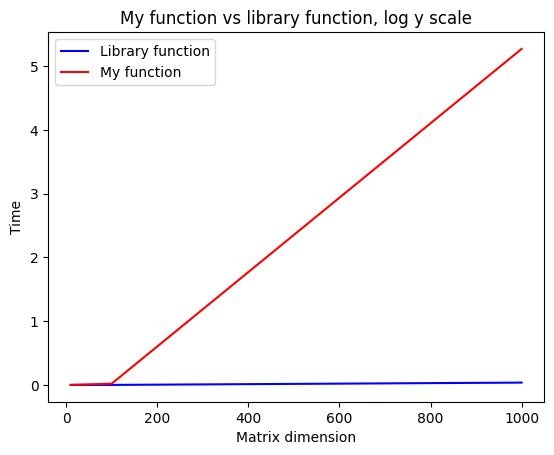

In [136]:
# Запустите этот блок кода
lib_times = []
my_times = []
dimensions = [10, 100, 1000]
for dim in dimensions:
    A = np.random.rand(dim, dim)
    res_lib = %timeit -o sla.det(A)
    lib_times.append(res_lib.best)
    res_my = %timeit -o my_det(A)
    my_times.append(res_my.best)

plt.plot(dimensions, lib_times, color='blue', label='Library function')
plt.plot(dimensions, my_times, color='red', label='My function')
plt.title('My function vs library function, log y scale')
plt.ylabel('Time')
plt.xlabel('Matrix dimension')
plt.legend()

У вас должны были получиться графики, показывающие, как растёт с ростом размерности матрицы время вычисления определителя. Поскольку они вышли не больно-то красивыми, мы нарисуем их в *логарифмическом масштабе* по оси у:

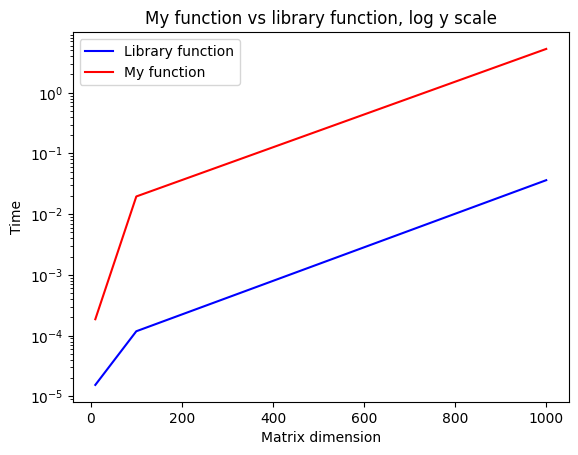

In [137]:
# Запустите этот блок кода
plt.semilogy(dimensions, lib_times, color='blue', label='Library function')
plt.semilogy(dimensions, my_times, color='red', label='My function')
plt.title('My function vs library function, log y scale')
plt.ylabel('Time')
plt.xlabel('Matrix dimension')
plt.legend()

Вы можете убедиться, что библиотечная функция работает *гораздо* быстрее.

## Часть 3. Точность

Наверняка вы уже что-то знаете про floating point arithmetics и связанные с этим трудности и понимаете, что на компьютере вычисления с вещественными числами производятся лишь с ограниченной точностью.

**Задание 3.1 [0.6 балла]** В качестве первого примера, показывающего различие между длинной арифметикой целых чисел и floating point arithmetics, предлагаем вам перемножить две пары матриц:

$$
\begin{pmatrix}
1 & 0\\
10^{20} & 1
\end{pmatrix}
\cdot
\begin{pmatrix}
10^{-20} & 1\\
0 & 1 - 10^{20}
\end{pmatrix}
$$
и
$$
\begin{pmatrix}
1. & 0.\\
10.^{20} & 1.
\end{pmatrix}
\cdot
\begin{pmatrix}
10.^{-20} & 1.\\
0. & 1. - 10.^{20}
\end{pmatrix}
$$
Во втором случае мы специально указали Питону (поставив везде десятичные точки), что хотим работать не с целыми числами, а с числами с плавающей точкой. Посмотрим, получатся ли одинаковые ответы:

In [138]:
# Your code here
A = np.array([[1, 0], [10**20, 1]])
B = np.array([[10**(-20), 1], [0, 1 - 10**20]])
print(A @ B)

[[1e-20 1]
 [1.0 1]]


In [139]:
C = np.array([[1., 0.], [10.**20, 1.]], dtype=object)
D = np.array([[10.**(-20), 1.], [0., 1. - 10.**20]], dtype=object)
print(C @ D)

[[1e-20 1.0]
 [1.0 0.0]]


И какой из них правильный?

---
Правильный ответ дан в первом случае, т.к. во втором случае из-за ограничения точности чисел с плавающей точкой у нас получается 0 на месте элемента с индексами 2, 2. Мой ответ: \begin{pmatrix}10^{-20} & 1\\1 & 1\end{pmatrix}


**Задание 3.2 [0.75 балла]** Впрочем, и с целыми числами тоже не всегда всё хорошо. Напишите функцию, генерирующую *матрицу Паскаля* заданной размерности $n$, то есть матрицу $P$, в которой $P_{ij} = C_{i+j}^i$. В этом задании нельзя пользоваться библиотечной функцией `scipy.linalg.pascal` или её аналогами из других библиотек. Обратите внимание, что использование факториалов крайне нежелательно, так как быстро приведёт к переполнению.

В этом задании вы можете использовать цикл ``for``.

In [143]:
def my_pascal(dim):
    """
    Мы создали для вас матрицу из нулей размера dim x dim,
    но вы можете ей не пользоваться, если не хотите
    """
    P = np.zeros((dim, dim), dtype=int)

    # Your code here
    for i in range(dim):
        for j in range(dim):
            if i == 0 or j == 0:
                P[i, j] = 1
            else:
                P[i, j] = P[i - 1, j] + P[i, j - 1]
    return P
print(my_pascal(5))
print(my_det(my_pascal(5)))


[[ 1  1  1  1  1]
 [ 1  2  3  4  5]
 [ 1  3  6 10 15]
 [ 1  4 10 20 35]
 [ 1  5 15 35 70]]
1.0


Чему равен её определитель? **Строго** поясните свой ответ.

----
Определитель всегда равен 1. Можно проверить через сведение к верхнетреугольному виду. Докажем для этого факт:
  1. Вычитание из i строки i - 1 это просто "смещение" i строки вправо на 1 (т.е. было 1 2 3 4 5, а стало 0 1 2 3 4).

Док-во:

Пусть есть квадратная матрица размера n. Рассмотрим i строку. Она будет состоять из элементов:
 \begin{pmatrix}C_{i - 1}^{0} & C_{i}^{1} & C_{i + 1}^{2} & C_{i + 2}^{3} & ... & C_{i + n - 2}^{n - 1}\end{pmatrix}

Рассмотрим i - 1 строку:

\begin{pmatrix}C_{i - 2}^{0} & C_{i - 1}^{1} & C_{i}^{2} & C_{i + 1}^{3} & ... & C_{i + n - 3}^{n - 1}\end{pmatrix}

После вычитания новый вид i строки будет:

 \begin{pmatrix}C_{i - 1}^{0} - C_{i - 2}^{0} & C_{i}^{1} - C_{i - 1}^{1} & C_{i + 1}^{2} - C_{i}^{2} & C_{i + 2}^{3} - C_{i + 1}^{3} & ... & C_{i + n - 2}^{n - 1} - C_{i + n - 3}^{n - 1}\end{pmatrix}

 Вспомним, что:

$C_n^k = C_{n-1}^k + C_{n-1}^{k-1}\Rightarrow C_{n-1}^{k-1} = C_n^k - C_{n-1}^k$

Тогда воспользовавшись равенством выше мы получаем, что i строка будет равна:

 \begin{pmatrix}0 & C_{i - 1}^{0} & C_{i}^{1} & C_{i + 1}^{2} & ... & C_{i + n - 3}^{n - 2}\end{pmatrix}

 Понимаем, что все элементы в строке действительно сместились вправо на один.
Ч.Т.Д.

Теперь предложим алгоритм, который сведет матрицу к верхнетреугольному виду. Будем вычитать из i строки i - 1 строку, начиная с нижней строчки, пока не дойдем до i = 1 (верхняя строчка). Этим способом мы получим столбец, состоящий полностью из нулей, за исключением элемента на пересечении первой строчки и первого столбца, иначе говоря, мы смогли обнулить все элементы под этим элементом. Ещё мы смогли сместить матрицу Паскаля на один вправо, т.е. каждый элемент нашей матрицы всё так же получается путем сложения элемента над ним и элемента слева от него. Т.е. полученная матрица будет содержать снизу справа блок размеров n - 1 на n - 1, сохраняющий свойства матрицы Паскаля. Иначе говоря, при повторном вычитании из i строки i - 1 строки, мы так же перенесем все элементы i строки на 1 вправо.

$C_{i}^{j} = C_{i - 1}^{j} + C_{i - 1}^{j - 1}$

Если мы вычтем элемент сверху - $C_{i - 1}^{j}$, то у нас останется только $C_{i - 1}^{j - 1}$, что в точности равно элементу стоящему слева - $C_{i - 1}^{j - 1} \Rightarrow$ мы сдвинули элементы строки на один вправо.

 Рассмотрим второй столбец, поймем, что он в точности будет равен первому столбцу до вычитания строк. Проделаем с ним аналогичные действия, но уже вплоть до i = 2 (т.е. до второй строки). Мы повторим это действие ровно n - 1 раз, сместив все единицы, которые были в первом столбце на диагональ, обнулив все элементы под диагональю. Итого у нас получается верхнетреугольная матрица, а значит мы можем посчитать ее определитель как произведение всех элементов на главной диагонали. Итого у нас получится  $1^{n - 1} = 1$ Ч.Т.Д.

А теперь вычислите определитель матрицы Паскаля $30\times30$ с помощью библиотечной функции `scipy.linalg.det`:

In [145]:
# Your code here
P = my_pascal(30)
print(sla.det(P))

-3.400444993542751e+51


Разница заметна невооружённым взглядом!

## Часть 4. Матричные вычисления

Вы уже видели, что использования циклов (и самописных вычислений в целом) в Питоне лучше по возможности избегать, и важно уметь находить способы делать всё библиотечными средствами.

В качестве примера рассмотрим две задачи:

**1.** Предположим, нужно вычислить суммы элементов в каждой строке матрицы `A`. Ясно, что можно написать простую функцию с двумя циклами, которая это посчитает, но так лучше не делать. Правильный способ такой:
```
A.sum(axis=1)
```
Параметр `axis=1` означает, что суммы берутся по строкам. Если вы хотите просуммировать по столбцам, укажите `axis=0`. Если вообще пропустить параметр `axis` (вызвать `A.sum()`), то функция вернёт сумму *всех* элементов матрицы.

**2.** Теперь допустим, что нам нужно каждый столбец матрицы `A` умножить на некоторое число. Более точно, пусть у нас есть (одномерный) вектор `w = np.array([w_1,...,w_n])`, и мы должны `i`-й столбец `A` умножить на число `w_i`. Опять же, это можно сделать в пару циклов, но лучше использовать операцию поэлементного умножения:
```
A * w.reshape((1,n))
```
Оператор `reshape` нужен для того, чтобы из одномерного вектора сделать вектор-строку.

Аналогично, если на числа `w_1,...,w_n` умножаются *строки* матрицы, нужно превратить `w` в вектор-столбец:
```
A * w.reshape((n,1))
```

Дальше вам будет предложено попрактиковаться в матричных вычислениях. В следующих трёх заданиях нельзя пользоваться циклами, а также конструкциями `map` и `reduce` и им подобными; вместо этого постарайтесь свести всё к матричным операциям из `numpy` (но, опять же, не `np.vectorize` или чему-то подобному). Чтобы убедиться, что получилось именно то, что нужно, пишите собственные тесты со случайными матрицами.

**Задание 4.1 [0.75 балла]** Напишите функцию `prod_and_sq_sum(A)`, вычисляющую произведение диагональных элементов, а также сумму квадратов диагональных элементов квадратной матрицы `A`.

In [147]:
# Your code here
def prod_and_sq_sum(A):
    if A.shape[0] != A.shape[1]:
      raise ValueError()
    res_prod = A.diagonal().prod()
    res_sum = (A.diagonal()**2).sum()
    return res_prod, res_sum

n = np.random.randint(2, 5)
A = np.random.randint(1, 12, size=(n, n))
print(A)
print(prod_and_sq_sum(A))

[[9 3 4]
 [9 9 7]
 [7 7 2]]
(162, 166)


**Задание 4.2 [0.75 балла]** Для матриц `A` и `B` размера $m\times n$ обозначим через $a_1,\ldots,a_n$ и $b_1,\ldots,b_n$ соответственно их столбцы; пусть также $\lambda_1, \ldots, \lambda_n$ – некоторые числа. Напишите функцию `f(A, B, lmbd, k)`, вычисляющую

$$\sum_{i=1}^{\min(k,n)}\lambda_ia_ib_i^T$$

In [175]:
# Your code here
def f(A, B, lmbd, k):
    mi = min(k, A.shape[1])
    A = A[:, :mi]
    B = B[:, :mi]
    lmbd = lmbd[:mi]
    res = (A * lmbd.reshape((1, lmbd.shape[0]))) @ B.T
    return res


k = np.random.randint(2, 5)
A = np.array([[7, 8, 9, 1], [4, 3, 2, 1], [5, 6, 2, 0]])
B = np.array([[7, 8, 9, 1], [1, 1, 1, 1], [3, 6, 9, 2]])
lmbd = np.array([7, 8, 9, 1])
print(f(A, B, lmbd, k))
print(A)
print(B)
print(k)



[[1585  195 1262]
 [ 551   71  392]
 [ 791  101  555]]
[[7 8 9 1]
 [4 3 2 1]
 [5 6 2 0]]
[[7 8 9 1]
 [1 1 1 1]
 [3 6 9 2]]
4


**Задание 4.3 [0.75 балла]** Напишите функцию `get_diag(A,B)`, принимающую две квадратных матрицы матрицы `A` и `B` одного размера и возвращающую вектор диагональных элементов произведения `AB`, не вычисляя произведение целиком.

In [176]:
# Your code here
def get_diag(A, B):
    res = np.sum(A * B.T, axis=1)
    return res


A = np.array([[1, 1, 1], [2, 2, 2], [3, 3, 3]])
B = np.array([[1, 1, 1], [2, 2, 2], [3, 3, 3]])
print(get_diag(A, B))
print(A @ B)
print('-----------------------------------------')
A = np.array([[3, 1, 7], [8, 2, 4], [5, 3, 0]])
B = np.array([[2, 5, 1], [2, 3, 0], [3, 4, 7]])
print(get_diag(A, B))
print(A @ B)

[ 6 12 18]
[[ 6  6  6]
 [12 12 12]
 [18 18 18]]
-----------------------------------------
[29 62  5]
[[29 46 52]
 [32 62 36]
 [16 34  5]]


## Часть 5. Комплексные числа и геометрия

У вас уже была возможность убедиться, что многие операции над комплексными числами имеют наглядную геометрическую интерпретацию. В этом задании вам будет предложено этим воспользоваться.

В Python число $i$ (мнимая единица) обозначено через `1j`. Так, число $0,5 + 1,2i$ будет иметь вид `0.5 + 1.2 * 1j`.

При выполнении задания вы должны работать с точками плоскости как с комплексными числами. Любые преобразования должны быть реализованы с помощью операций над комплексными числами: сложения, вычитания, умножения, деления, возведения в степень и комплексного сопряжения.

**Задание 5.1 [0.5 баллов]** Напишите функцию `shrink_rotate`, которая принимает на вход:
- заданную в виде комплексного числа точку $X$, которую мы подвергаем преобразованию,
- заданную в виде комплексного числа точку $A$,
- действительный коэффициент `coef`,
- угол `alpha`, заданный в радианах

и осуществляет следующее преобразование: мы берём вектор $AX$, умножаем его на `coef`, поворачиваем вокруг точки $A$ на угол `alpha` против часовой стрелки, после чего возвращаем конец полученного вектора. Ниже (левая картинка) мы приводим иллюстрацию действия этого преобразования:

<img src="ShrinkRotate.png">

**Задание 5.2 [0.5 баллов]** Напишите функцию `shrink_rotate_conj`, которая сначала делает то же самое, что и `shrink_rotate`, а после этого отражает вектор $AY$ относительно горизонтальной прямой, проходящей через точку $A$, и возвращает точку $Y'$ (см. правую часть рисунка).

**Задание 5.3 [0.5 баллов]** Напишите функцию `geometric_inverse`, которая принимает на вход:
- заданную в виде комплексного числа точку $X$, которую мы подвергаем преобразованию,
- заданную в виде комплексного числа точку $A$,
- положительное действительное число $r$

и осуществляет инверсию точки $X$ относительно окружности с центром $A$ радиуса $r$. [Определение инверсии вы можете посмотреть здесь](https://ru.wikipedia.org/wiki/%D0%98%D0%BD%D0%B2%D0%B5%D1%80%D1%81%D0%B8%D1%8F_(%D0%B3%D0%B5%D0%BE%D0%BC%D0%B5%D1%82%D1%80%D0%B8%D1%8F)).

In [154]:
from math import pi


def shrink_rotate(x, a, coef=1.0, angle=0.0):
    # Your code here
    scaled_ax = (x - a) * coef
    return scaled_ax * np.exp(1j * angle) + a
    raise NotImplementedError()


print(shrink_rotate(1 + 2 * 1j, 0, coef=1.0, angle=pi / 180 * 45.0))
print(shrink_rotate(2 + 2 * 1j, 0, coef=1.0, angle=pi / 180 * 90.0))
print(shrink_rotate(1, 2, coef=1.0, angle=pi / 180 * 90.0))
print("----------------------------------------------------------")


def shrink_rotate_conj(x, a, coef=1.0, angle=0.0):
    # Your code here
    scaled_ax = (x - a) * coef
    return (scaled_ax * np.exp(1j * angle)).conjugate() + a
    raise NotImplementedError()


print(shrink_rotate_conj(1 + 2 * 1j, 0, coef=1.0, angle=pi / 180 * 45.0))
print(shrink_rotate_conj(2 + 2 * 1j, 0, coef=1.0, angle=pi / 180 * 90.0))
print(shrink_rotate_conj(1, 2, coef=1.0, angle=pi / 180 * 90.0))
print("----------------------------------------------------------")

def geometric_inverse(x, a, r):
    # Your code here
    if x - a == 0:
       raise ValueError('Нельзя инвертировать')
    return r**2 / abs(x - a)**2 * (x - a) + a
    raise NotImplementedError()
print(geometric_inverse(1, 3, 1))

(-0.7071067811865474+2.121320343559643j)
(-1.9999999999999998+2j)
(2-1j)
----------------------------------------------------------
(-0.7071067811865474-2.121320343559643j)
(-1.9999999999999998-2j)
(2+1j)
----------------------------------------------------------
2.5


**Задание 5.4 [0.75 баллов]** Рассмотрим следующий процесс:

```
z = 0.5 + 0.*1j
max_iter = 100000
funcs = [
    (lambda t: shrink_rotate(t, 0. + 1.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, 1. + 0.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, -1. + 0.*1j, coef=0.5, angle=0.))
]

for n_iter in range(max_iter):
    n_func = np.random.choice(len(funcs))
    z = funcs[n_func](z)
```

Запустите его и нарисуйте множество точек, получающихся на итерациях начиняя с десятой.

*Указание*. Представьте квадрат $[-1,1]\times[-1,1]$ матрицей пикселей 1000x1000. Сначала все элементы матрицы положим нулями, а на каждой итерации начиная с десятой будем присваивать единицу соответствующему пикселю этой матрицы. То, что получилось, можно нарисовать с помощью функции `plt.imshow(..., cmap='gray')`. Картинку лучше сделать побольше, предварив `imshow` вызовом `plt.figure(figsize=(20, 20))`.

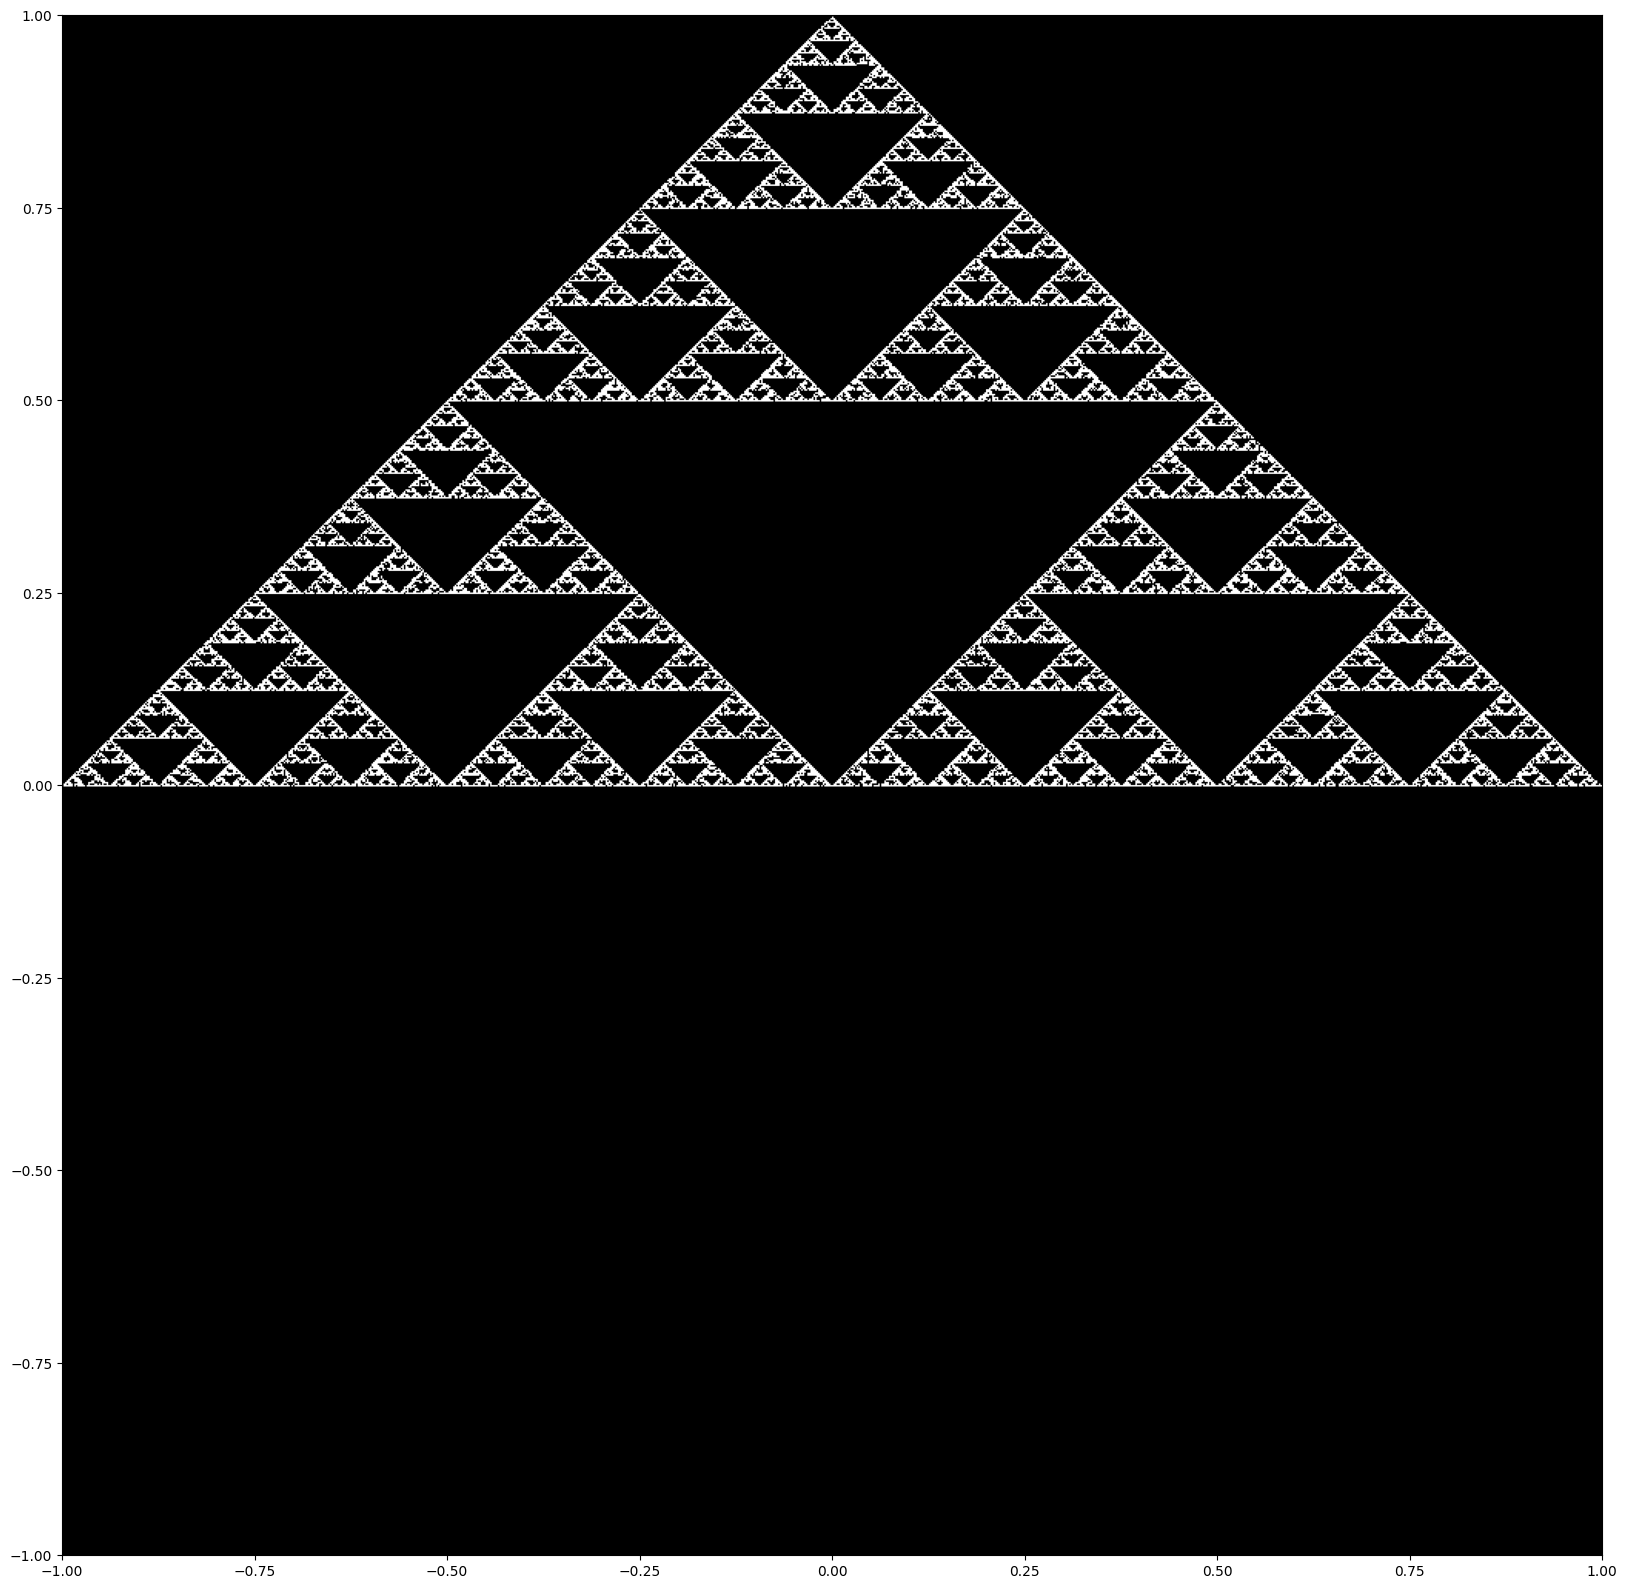

In [ ]:
# Your code here
z = 0.5 + 0.*1j
max_iter = 100000
mat = np.zeros((1000, 1000))

funcs = [
    (lambda t: shrink_rotate(t, 0. + 1.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, 1. + 0.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, -1. + 0.*1j, coef=0.5, angle=0.))
]


for n_iter in range(max_iter):
    n_func = np.random.choice(len(funcs))
    z = funcs[n_func](z)


    j = int((z.real + 1) / 2 * 1000)
    i = int((z.imag + 1) / 2 * 1000)


    if 0 <= j < 1000 and 0 <= i < 1000:
        if n_iter >= 10:
            mat[-i, j] = 1




plt.figure(figsize=(20, 20))
plt.imshow(mat, cmap='gray', extent=[-1, 1, -1, 1])
plt.show()

**Задание 5.5 [0.75 баллов]** Попробуйте объяснить, почему получается именно эта фигура.

---
Изначально мы начинаем с точки z = 0.5 + 0.*1j. На каждом шаге итерации мы случайным образом выбираем одну из трёх данных нам функций. кажая функция по сути сжимает нашу точку относительно центра в выбранной случайным образом функции (центры: 0 + 1 * 1j, 1 + 0 * 1j, -1 + 0 * 1j). Сжимаем точку мы, потому что coef = 0.5. Никакого вращения не происходит, поскольку angle = 0.


Т.к. сжатие происходит к трем центрам, то наша точка будет все ближе приближаться к ним, формируя узоры подобные начальному.

Т.к. наши центры заданы так, что они формируют равнобедренный треугольник, то наш итоговый узор будет тоже в форме треугольника.


**Задание 5.6 [0.5 баллов]** Поэкспериментируйте с другими преобразованиями. Попробуйте найти какой-нибудь другой красиво выглядящий фрактал.

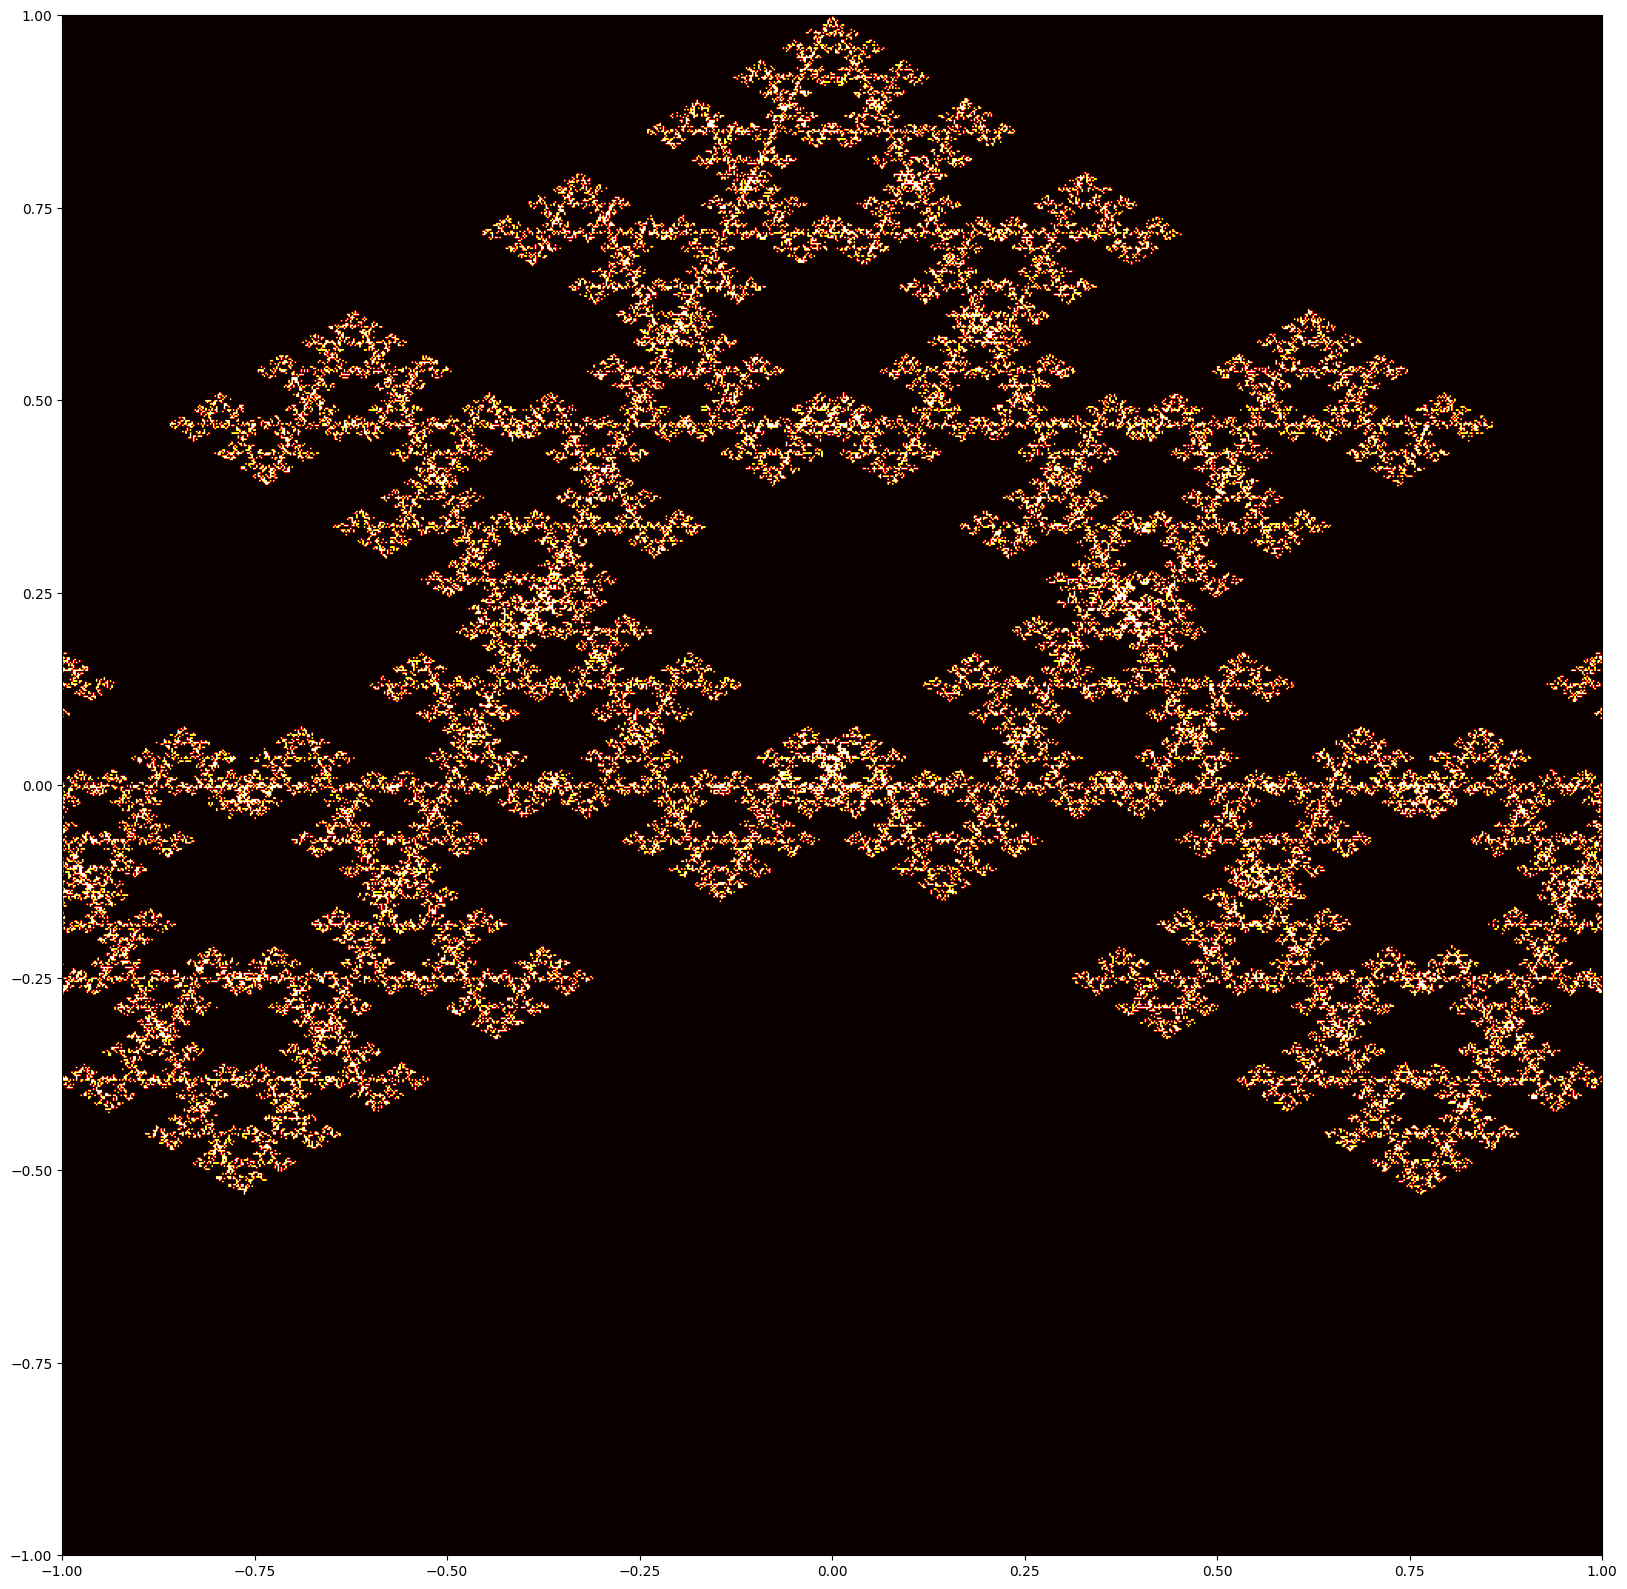

In [156]:
z = 0.5 + 0.*1j
max_iter = 100000
mat = np.zeros((1000, 1000))

funcs = [
    (lambda t: shrink_rotate(t, 0. + 1.*1j, coef=0.53, angle=0.)),
    (lambda t: shrink_rotate(t, 0.5 + 0.*1j, coef=0.53, angle=np.pi)),
    (lambda t: shrink_rotate(t, -0.5 + 0.*1j, coef=-0.53, angle=0.))
]


for n_iter in range(max_iter):
    n_func = np.random.choice(len(funcs))
    z = funcs[n_func](z)


    j = int((z.real + 1) / 2 * 1000)
    i = int((z.imag + 1) / 2 * 1000)


    if 0 <= j < 1000 and 0 <= i < 1000:
        if n_iter >= 10:
            mat[-i, j] = 1




plt.figure(figsize=(20, 20))
plt.imshow(mat, cmap='hot', extent=[-1, 1, -1, 1])
plt.show()

## Часть 6 (бонус). Метод Гаусса или обратные матрицы?

**Задание 6.1 [1.5 балла]** Пусть нам дано матричное уравнение $Ax = B$, где $A$ – матрица размера $n\times n$, а $B$ – матрица размера $n\times m$ (отметим, что это уравнение можно интерпретировать как $m$ систем с векторными правыми частями и однаковыми левыми). Вообще говоря, методов решения таких уравнений очень много, но мы пока рассмотрим два из них, с которыми вы уже хорошо знакомы.
1. Метод Гаусса;
2. Умножение на обратную матрицу: $x = A^{-1}B$.

В этом задании вы попробуете ответить на вопрос о том, какой из этих методов эффективнее. Проведите два эксперимента:
- сравните скорости решения системы при фиксированном `m = 10` и `n`, изменяющемся в пределах от 10 до 1000, например, для `n=10, 50, 100, 200, 500, 1000` (рост числа неизвестных при фиксированном количестве правых частей);
- сравните скорости решения системы при фиксированном `n = 100` и `m`, меняющемся от 10 до 10000, например, для `m = 10, 100, 500, 1000, 2000, 5000, 10000` (рост числа правых частей при фиксированном числе неизвестных).

При проведении экспериментов не возбраняется использовать циклы `for`.

Эксперименты проведите на случайных матрицах, созданных с помощью функции `numpy.random.rand`. Постройте графики времени выполнения функции от размерности (лучше в логарифмическом масштабе). Сделайте выводы (в письменном виде!) о том, какой из методов оказывается лучше в каких обстоятельствах.

Чтобы всё это не казалось вам чёрной магией, найдите число операций (суммарно сложения, умножения и деления), необходимых для решения системы каждым из методов. Обратите внимания на члены суммарной степени 3 (суммарной по $m$ и $n$; члены меньшего порядка можете даже не считать). Постарайтесь объяснить полученные ранее результаты.

22 µs ± 675 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
The slowest run took 5.92 times longer than the fastest. This could mean that an intermediate result is being cached.
99.8 µs ± 94.3 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
91.2 µs ± 569 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
205 µs ± 98.3 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
524 µs ± 11.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
426 µs ± 14.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
11.8 ms ± 6.47 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
2.04 ms ± 792 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
57.3 ms ± 13.6 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
The slowest run took 6.49 times longer than the fastest. This could mean that an intermediate result is being cached.
29.7 ms ± 20.3 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
207 ms ± 54.2 ms per loop (mean ± std. dev.

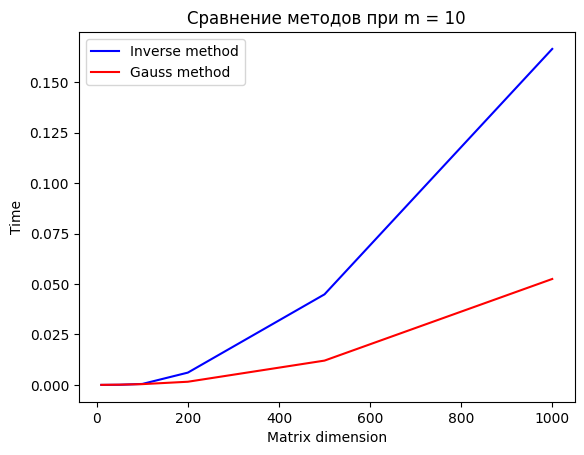

In [ ]:
# Your code here
def inverse(A, B):
    A = sla.inv(A)
    return A @ B

def gauss(A, B):
    return sla.solve(A, B)


inverse_times = []
gauss_times = []
dimensions = [10, 50, 100, 200, 500, 1000]
for n in dimensions:
    A = np.random.rand(n, n)
    B = np.random.rand(n, 10)
    res_inverse = %timeit -o inverse(A, B)
    inverse_times.append(res_inverse.best)
    res_gauss = %timeit -o gauss(A, B)
    gauss_times.append(res_gauss.best)

plt.plot(dimensions, inverse_times, color='blue', label='Inverse method')
plt.plot(dimensions, gauss_times, color='red', label='Gauss method')
plt.title('Сравнение методов при m = 10')
plt.ylabel('Time')
plt.xlabel('Matrix dimension')
plt.legend()

The slowest run took 8.73 times longer than the fastest. This could mean that an intermediate result is being cached.
1.26 ms ± 1.35 ms per loop (mean ± std. dev. of 7 runs, 1000 loops each)
431 µs ± 14.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
2.59 ms ± 1.15 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
996 µs ± 602 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
2.94 ms ± 723 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
1.77 ms ± 872 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
4.63 ms ± 1.82 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
2.92 ms ± 1.17 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
7.7 ms ± 3.8 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
4.62 ms ± 165 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
12.9 ms ± 5.12 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
14.2 ms ± 4.27 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
18.5 ms ± 5.29 ms per 

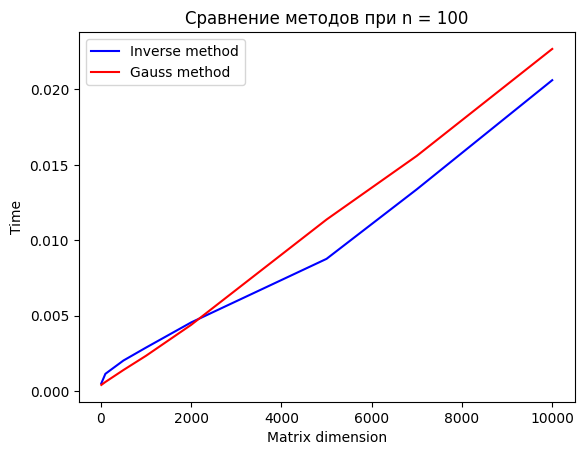

In [ ]:
def inverse(A, B):
    A = sla.inv(A)
    return A @ B

def gauss(A, B):
    return sla.solve(A, B)


inverse_times = []
gauss_times = []
dimensions = [10, 100, 500, 1000, 2000, 5000, 7000, 10000]
for m in dimensions:
    A = np.random.rand(100, 100)
    B = np.random.rand(100, m)
    res_inverse = %timeit -o inverse(A, B)
    inverse_times.append(res_inverse.best)
    res_gauss = %timeit -o gauss(A, B)
    gauss_times.append(res_gauss.best)

plt.plot(dimensions, inverse_times, color='blue', label='Inverse method')
plt.plot(dimensions, gauss_times, color='red', label='Gauss method')
plt.title('Сравнение методов при n = 100')
plt.ylabel('Time')
plt.xlabel('Matrix dimension')
plt.legend()

Мы видим, что при фиксированном m на уровне 10 и произвольным n. Метод Гаусса работает бытсрее, чем метод обратной матрицы.

При n = 100, а m - любое, мы видим, что при достаточно больших m, метод обратной матрицы показывает себя лучше, поскольку работает быстрее метода Гаусса.

Сравним сложности.
У метода Гаусса сложность - $O(n^{3})$, но наи приходится совершить около $n^{3} + n^{2} * m$ операций, где первое слагаемое это приведение к ступенчатому виду, второе - это операции с матрицей B в ходе преобразований матрицы A.


У метода обратной матрицы сложность - $O(n^{3})$, но помимо нахождения обратной матрицы нам придется перемножать матрицы, что дополнительно потребует $n^{2} * m$ операций.

Поэтому при больших n нам есть смысл сразу использовать метод Гаусса, поскольку это значительно сократит количество операций.